Exploratory Data Analysis

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Load the Dataset

In [2]:
data = pd.read_csv('usjobs_train.csv')

In [3]:
# Display dataset structure and basic information
print("Dataset Overview:")
print(data.head())

Dataset Overview:
                     ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County O

In [4]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33248 entries, 0 to 33247
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                33248 non-null  object 
 1   Job               33248 non-null  object 
 2   Jobs_Group        33248 non-null  object 
 3   Profile           12141 non-null  object 
 4   Remote            13929 non-null  object 
 5   Company           33239 non-null  object 
 6   Location          33235 non-null  object 
 7   City              29424 non-null  object 
 8   State             30136 non-null  object 
 9   Frecuency_Salary  33248 non-null  object 
 10  Mean_Salary       33248 non-null  float64
 11  Skills            33248 non-null  object 
 12  Sector            26034 non-null  object 
 13  Sector_Group      26034 non-null  object 
 14  Revenue           14930 non-null  object 
 15  Employee          20449 non-null  object 
 16  Company_Score     24486 n

# 2. Exploratory Data Analysis (EDA)

In [5]:
# Basic statistical summary of numerical features
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
         Mean_Salary  Company_Score        Reviews  Director_Score
count   33248.000000   24486.000000   24486.000000    11324.000000
mean   104938.652004       3.659287    2724.875398        0.748707
std     43891.461738       0.629555   13336.396863        0.110831
min      9200.000000       1.000000       1.000000        0.060000
25%     75000.000000       3.400000      13.000000        0.680000
50%     96600.000000       3.700000     117.000000        0.780000
75%    125000.000000       4.000000     960.000000        0.830000
max    585000.000000       5.000000  247915.000000        1.000000


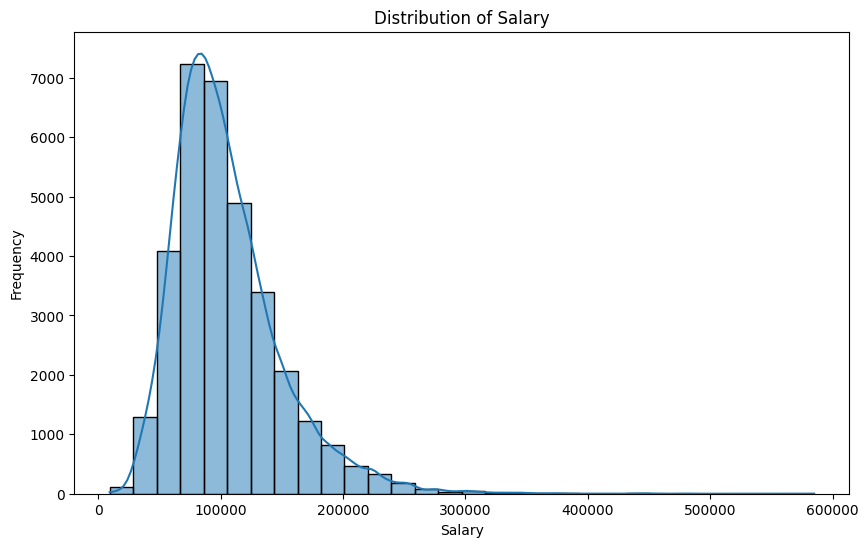

In [6]:
# Visualizing target variable (salary)
plt.figure(figsize=(10, 6))
sns.histplot(data['Mean_Salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Identify all columns and missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                      0
Job                     0
Jobs_Group              0
Profile             21107
Remote              19319
Company                 9
Location               13
City                 3824
State                3112
Frecuency_Salary        0
Mean_Salary             0
Skills                  0
Sector               7214
Sector_Group         7214
Revenue             18318
Employee            12799
Company_Score        8762
Reviews              8762
Director            20785
Director_Score      21924
URL                 16033
dtype: int64


In [8]:
# Identify only columns with missing values
missing_data = data.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_data[missing_data > 0])


Columns with Missing Values:
Profile           21107
Remote            19319
Company               9
Location             13
City               3824
State              3112
Sector             7214
Sector_Group       7214
Revenue           18318
Employee          12799
Company_Score      8762
Reviews            8762
Director          20785
Director_Score    21924
URL               16033
dtype: int64


In [9]:
# Separate features and target
X = data.drop(columns=['Mean_Salary'])  # Features
y = data['Mean_Salary']                # Target variable

In [10]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [11]:
# Check for missing values in categorical columns
categorical_missing = X[categorical_cols].isnull().sum()

# Filter to show only columns with missing values
categorical_missing = categorical_missing[categorical_missing > 0]

# Print the results
print("Categorical Columns with Missing Values:")
print(categorical_missing)

Categorical Columns with Missing Values:
Profile         21107
Remote          19319
Company             9
Location           13
City             3824
State            3112
Sector           7214
Sector_Group     7214
Revenue         18318
Employee        12799
Director        20785
URL             16033
dtype: int64


# 3. Data Cleaning and Preprocessing

In [12]:
# ---- Step 1: Handle Missing Values ----
# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

In [13]:
# Replace missing values in categorical columns with "unknown"
for col in categorical_cols:
    X[col] = X[col].fillna('unknown')

In [14]:
# Verify the replacements
print("Missing Values After Replacement:")
print(X[categorical_cols].isnull().sum())

Missing Values After Replacement:
ID                  0
Job                 0
Jobs_Group          0
Profile             0
Remote              0
Company             0
Location            0
City                0
State               0
Frecuency_Salary    0
Skills              0
Sector              0
Sector_Group        0
Revenue             0
Employee            0
Director            0
URL                 0
dtype: int64


# 4. Train-Test Split

In [15]:
# ---- Step 4: Split Data ----
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Print confirmation and shapes
print("\nPreprocessing Complete!")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


Preprocessing Complete!
X_train shape: (26598, 20)
X_val shape: (6650, 20)


In [17]:
print(X_train)

                         ID  \
10347  job_60370f42fdb420cd   
14809  job_7c73e081706cbb63   
19012  job_a9a6f115ff5190df   
23734  job_4d28b8fc715db2d5   
31822  job_b392816fa51f6caf   
...                     ...   
16850  job_bfb48754a5b59c5c   
6265    sj_9a055bf99ad75432   
11284  job_939b04bfa9c333a6   
860    job_929fa7da71314b7f   
15795  job_995d9825eb74356c   

                                                     Job         Jobs_Group  \
10347  Business Systems Analyst – Core Software Solut...   Business Analyst   
14809                           Budget Analyst 1, 2 or 3  Financial Analyst   
19012                                      Sales Analyst       Data Analyst   
23734          Financial Planning & Analysis Analyst III  Financial Analyst   
31822                              Python/ Data Engineer      Data Engineer   
...                                                  ...                ...   
16850                                     Data Scientist     Data Scientis

# 5. Train and Evaluate a Effective Model using PyCaret

In [18]:
from pycaret.regression import *
import pandas as pd

In [19]:
# Combine X and y into a single DataFrame
train_data = X.copy()
train_data['Mean_Salary'] = y

In [20]:
# Initialize PyCaret
regression_setup = setup(
    data=train_data,
    target='Mean_Salary',            # Target variable
    train_size=0.8,                  # 80-20 train-test split within PyCaret
    normalize=True,                  # Ensure features are scaled
    session_id=42,                   # For reproducibility
)

,Description,Value
0,Session id,42
1,Target,Mean_Salary
2,Target type,Regression
3,Original data shape,"(33248, 21)"
4,Transformed data shape,"(33248, 61)"
5,Transformed train set shape,"(26598, 61)"
6,Transformed test set shape,"(6650, 61)"
7,Numeric features,3
8,Categorical features,17
9,Preprocess,True


In [21]:
# Compare Models
best_model = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,22596.2322,1057256761.6000,32498.7271,0.4494,0.2971,0.2359,0.1670
en,Elastic Net,26304.4667,1272444001.4305,35664.3987,0.3371,0.3382,0.2959,0.1190
et,Extra Trees Regressor,32972.5032,1907943506.8039,43675.1943,0.0058,0.4119,0.3746,1.0600
xgboost,Extreme Gradient Boosting,33013.0596,1919396096.0000,43805.8809,-0.0001,0.4125,0.3742,0.2000
lightgbm,Light Gradient Boosting Machine,33042.5579,1919819542.4522,43810.8333,-0.0003,0.4128,0.3751,0.2230
gbr,Gradient Boosting Regressor,33058.3298,1919912308.6914,43811.8838,-0.0004,0.4130,0.3756,0.6300
ridge,Ridge Regression,33040.7256,1920056120.0250,43813.4886,-0.0005,0.4128,0.3750,0.1150
huber,Huber Regressor,33042.7430,1920260824.9564,43815.8108,-0.0006,0.4128,0.3750,0.4190
omp,Orthogonal Matching Pursuit,33042.7607,1920278539.1143,43816.0265,-0.0006,0.4128,0.3750,0.1120
lr,Linear Regression,33042.7607,1920278539.1143,43816.0265,-0.0006,0.4128,0.3750,0.3560


In [22]:
# Tune the Best Model
tuned_model = tune_model(best_model, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21733.3864,946524535.7001,30765.6389,0.4894,0.2849,0.2272
1,21985.0452,1095251811.2276,33094.5889,0.4391,0.2971,0.2346
2,21839.1854,1010858258.0498,31793.9972,0.4749,0.2880,0.2271
3,21902.0807,991173304.5616,31482.9050,0.4671,0.2860,0.2272
4,22765.6609,1159166322.6526,34046.5317,0.4240,0.2972,0.2318
5,22458.0636,1018870482.6164,31919.7507,0.4539,0.2940,0.2367
6,22274.6690,1060777718.3323,32569.5827,0.4543,0.2907,0.2283
7,21395.4729,947581193.9170,30782.8068,0.5018,0.2830,0.2228
8,22152.4897,1029862604.0057,32091.4724,0.4883,0.2856,0.2259


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
# Finalize and Save the Model
final_model = finalize_model(tuned_model)

In [24]:
# Display the performance of the tuned model
print("\nTuned Model Performance:")
evaluate_model(final_model)


Tuned Model Performance:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…